# Neural Networks: CNN

The work of this notebook is based on the paper from Jain et al. [1][2]. A CNN is trained using semantically enriched vectors (using Word2Vec).


[1] Gauri Jain, Manisha Sharma, and Basant Agarwal. Spam detection on social media using semantic convolutional neural network. *International Journal of Knowledge Discovery inBioinformatics (IJKDB)*, 8(1):12–26, 2018.

[2] Gauri Jain, Manisha Sharma, and Basant Agarwal. Spam detection in social media using convolutional and long short term memory neural network. *Annals of Mathematics andArtificial Intelligence*, 85(1):21–44, 2019

## Imports and function definitions

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pickle

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, Input, LSTM, MaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.metrics import accuracy_score, classification_report

In [23]:
def plot_metrics(history, validation=False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(12)
    # Accuracy
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.plot(history['accuracy'])
    if validation:
        ax1.plot(history['val_accuracy'])
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    ax2.set_title('Model loss') 
    ax2.set_ylabel('Loss') 
    ax2.set_xlabel('Epoch')
    ax2.plot(history['loss'])
    if validation:
        ax2.plot(history['val_loss'])
    ax2.legend(['Train', 'Validation'], loc='upper left') 

    plt.show()

In [24]:
# Show versions
import platform
import keras
import tensorflow as tf

print(f"Python: {platform.python_version()}")
print(f"Keras: {keras.__version__}")
print(f"Tensorflow: {tf.__version__}")

Python: 3.6.9
Keras: 2.4.3
Tensorflow: 2.3.0


In [25]:
# Connect to GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Data loading

In [26]:
# When using Goolge Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
base_path = "/content/drive/My Drive"

In [28]:
X_train = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_X_train.pkl","rb"))
X_test = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_X_test.pkl","rb"))
X_val = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_X_val.pkl","rb"))
y_train = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_y_train.pkl","rb"))
y_test = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_y_test.pkl","rb"))
y_val = pickle.load(open(f"{base_path}/datasets/neural_networks/zenodo_open_metadata_2020-11-21_y_val.pkl","rb"))

In [29]:
print(f"Training set shape {X_train.shape}")
print(f"Validation set shape {X_val.shape}")
print(f"Test set shape {X_test.shape}")

Training set shape (47607, 4539)
Validation set shape (5290, 4539)
Test set shape (22671, 4539)


In [30]:
num_classes = 2  # Number of target classes (Spam and Ham)

In [31]:
print(f"Training labels set size {y_train.shape}")
print(f"Validation labels set size {y_val.shape}")
print(f"Test labels set size {y_test.shape}")

Training labels set size (47607, 2)
Validation labels set size (5290, 2)
Test labels set size (22671, 2)


In [32]:
vocab_size = 150000
max_length = 4539

## CNN

From the paper of Jain et al. the hyperparameters are:

|   | SMS | Twitter |
|:--|:---:|:-------:|
|Number of filters| 128 | 54 |
|Filter length| 5 | 4 |
|Droput | 0.1 | 0.2 |
|Optimizer | Adagrad (lr: 0.1) | Adagrad (lr: 0.1) |
|Activation function | ReLu | ReLu |
|Epochs | 10 | 10 |

Note that we had to ignore the number of features used by the atuthor to be able to fit the vocabulary in the embedding, accounting for multi-language content (i.e. a bigger number of words). To run one or the other simply change the configuration in the code below.

In [26]:
with tf.device('/device:GPU:0'):
  
  cnn_model = Sequential()

  cnn_model.add(Embedding(input_dim=vocab_size, output_dim=200, input_length=max_length))
  cnn_model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
  cnn_model.add(MaxPooling1D())
  cnn_model.add(Dropout(rate=0.1))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(units=num_classes, activation="softmax"))

  cnn_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

  cnn_history = cnn_model.fit(
      X_train,
      y_train,
      epochs=10,
      validation_data=(X_val, y_val)
  )

Epoch 1/10
1488/1488 [==============================] - 116s 78ms/step - loss: 0.4171 - accuracy: 0.7988 - val_loss: 0.3944 - val_accuracy: 0.8164
Epoch 2/10
1488/1488 [==============================] - 115s 77ms/step - loss: 0.3784 - accuracy: 0.8215 - val_loss: 0.3708 - val_accuracy: 0.8388
Epoch 3/10
1488/1488 [==============================] - 115s 77ms/step - loss: 0.3514 - accuracy: 0.8454 - val_loss: 0.3387 - val_accuracy: 0.8656
Epoch 4/10
1488/1488 [==============================] - 115s 78ms/step - loss: 0.3161 - accuracy: 0.8748 - val_loss: 0.3026 - val_accuracy: 0.8773
Epoch 5/10
1488/1488 [==============================] - 116s 78ms/step - loss: 0.2807 - accuracy: 0.8882 - val_loss: 0.2722 - val_accuracy: 0.8868
Epoch 6/10
1488/1488 [==============================] - 116s 78ms/step - loss: 0.2499 - accuracy: 0.9050 - val_loss: 0.2434 - val_accuracy: 0.9059
Epoch 7/10
1488/1488 [==============================] - 116s 78ms/step - loss: 0.2228 - accuracy: 0.9206 - val_loss: 0

In [27]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4539, 200)         30000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4535, 128)         128128    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2267, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2267, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 290176)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 580354    
Total params: 30,708,482
Trainable params: 30,708,482
Non-trainable params: 0
__________________________________________

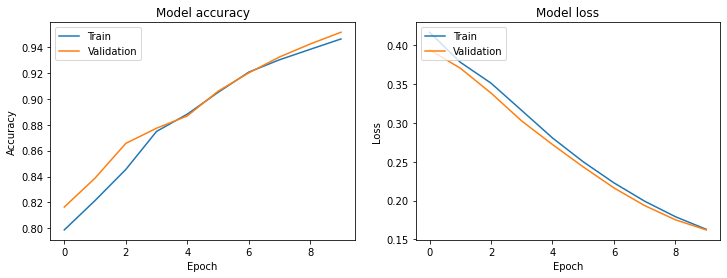

In [28]:
plot_metrics(cnn_history.history, validation=True)

In [29]:
# Save model
cnn_model.save(f"{base_path}/models/2020_11_21_paper_sms_cnn")

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/2020_11_21_paper_sms_cnn/assets


In [30]:
cnn_y_train_predclass = cnn_model.predict(X_train)

sl_cnn_y_train_predclass = np.argmax(cnn_y_train_predclass, axis=1)
sl_y_train = np.argmax(y_train, axis=1)

cnn_train_accuracy = round(accuracy_score(sl_y_train, sl_cnn_y_train_predclass), 3)
print(f"Train accuracy: {cnn_train_accuracy}")

print("Train Classification Report")
print(classification_report(sl_y_train, sl_cnn_y_train_predclass))

Train accuracy: 0.951
Train Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23694
           1       0.97      0.93      0.95     23913

    accuracy                           0.95     47607
   macro avg       0.95      0.95      0.95     47607
weighted avg       0.95      0.95      0.95     47607



In [31]:
cnn_y_test_predclass = cnn_model.predict(X_test)

sl_cnn_y_test_predclass = np.argmax(cnn_y_test_predclass, axis=1)
sl_y_test = np.argmax(y_test, axis=1)

cnn_test_accuracy = round(accuracy_score(sl_y_test, sl_cnn_y_test_predclass), 3)
print(f"Test accuracy: {cnn_test_accuracy}")

print("Test Classification Report")
print (classification_report(sl_y_test, sl_cnn_y_test_predclass))

Test accuracy: 0.95
Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11448
           1       0.97      0.93      0.95     11223

    accuracy                           0.95     22671
   macro avg       0.95      0.95      0.95     22671
weighted avg       0.95      0.95      0.95     22671



### Results

Configuration specific to this problem:
- Embedding dimension: 200
- Batch size: 32 (default)
- Vocabulary size: 150000
- Max vector length: 4539

**SMS configuration** (/models/2020_11_21_paper_sms_cnn)

- Time per epoch: ~116s
- 10th epoch accuracy: 0.9462
- 10th epoch validation accuracty: 0.9414
- Train set accuracy: 0.951
- Test set accuracy: 0.95

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.93|0.97|0.95|23694|
|1|0.97|0.93|0.95|23913|
||||||
|accuracy|||0.95|47607|
|macro avg|0.95|0.95|0.95|47607|
|weighted avg|0.95|0.95|0.95|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.93|0.97|0.95|11448|
|1|0.97|0.93|0.95|11223|
||||||
|accuracy|||0.95|22671|
|macro avg|0.95|0.95|0.95|22671|
|weighted avg|0.95|0.95|0.95|22671|


**Twitter configuration** (/models/2020_11_21_paper_twitter_cnn)

- Time per epoch: ~99s
- 10th epoch accuracy: 0.9441
- 10th epoch validation accuracty: 0.9482
- Train set accuracy: 0.948
- Test set accuracy: 0.946

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.92|0.98|0.95|23694|
|1|0.98|0.92|0.95|23913|
||||||
|accuracy|||0.95|47607|
|macro avg|0.95|0.95|0.95|47607|
|weighted avg|0.95|0.95|0.95|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.92|0.98|0.95|11448|
|1|0.98|0.91|0.94|11223|
||||||
|accuracy|||0.95|22671|
|macro avg|0.95|0.95|0.95|22671|
|weighted avg|0.95|0.95|0.95|22671|

## RNN

From the paper of Jain et al. the hyperparameters are:

|   | SMS | Twitter |
|:--|:---:|:-------:|
|Number of units| 100 | 100 |
|Droput | 0.1 | 0.2 |
|Optimizer | Adagrad (lr: 0.1) | Adagrad (lr: 0.1) |
|Activation function | ReLu | ReLu |
|Epochs | 10 | 10 |

Note that we had to ignore the number of features used by the atuthor to be able to fit the vocabulary in the embedding, accounting for multi-language content (i.e. a bigger number of words). To run one or the other simply change the configuration in the code below.



In [48]:
with tf.device('/device:GPU:0'):
  
  rnn_model = Sequential()

  rnn_model.add(Embedding(input_dim=vocab_size, output_dim=200, input_length=max_length))
  rnn_model.add(LSTM(units=100))
  rnn_model.add(Dropout(rate=0.1))
  rnn_model.add(Dense(units=num_classes, activation="sigmoid"))

  rnn_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

  rnn_history = rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1488/1488 [==============================] - 357s 240ms/step - loss: 0.6894 - accuracy: 0.6993 - val_loss: 0.6861 - val_accuracy: 0.7274
Epoch 2/10
1488/1488 [==============================] - 357s 240ms/step - loss: 0.6817 - accuracy: 0.7311 - val_loss: 0.6754 - val_accuracy: 0.7302
Epoch 3/10
1488/1488 [==============================] - 359s 241ms/step - loss: 0.5986 - accuracy: 0.7704 - val_loss: 0.3951 - val_accuracy: 0.8484
Epoch 4/10
1488/1488 [==============================] - 369s 248ms/step - loss: 0.3382 - accuracy: 0.8718 - val_loss: 0.3111 - val_accuracy: 0.8854
Epoch 5/10
1488/1488 [==============================] - 368s 247ms/step - loss: 0.2759 - accuracy: 0.8978 - val_loss: 0.2617 - val_accuracy: 0.8989
Epoch 6/10
1488/1488 [==============================] - 369s 248ms/step - loss: 0.4174 - accuracy: 0.8262 - val_loss: 0.5748 - val_accuracy: 0.7161
Epoch 7/10
1488/1488 [==============================] - 373s 251ms/step - loss: 0.4033 - accuracy: 0.8041 - val_

In [49]:
rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4539, 200)         30000000  
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 30,120,602
Trainable params: 30,120,602
Non-trainable params: 0
_________________________________________________________________


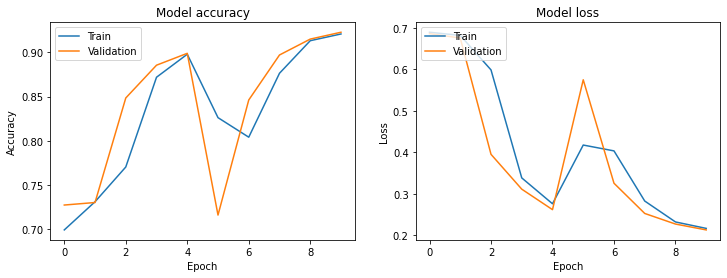

In [50]:
plot_metrics(rnn_history.history, validation=True)

In [51]:
rnn_model.save(f"{base_path}/models/2020_11_19_paper_sms_rnn")

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/2020_11_19_paper_sms_rnn/assets


In [52]:
rnn_y_train_predclass = rnn_model.predict(X_train)

sl_rnn_y_train_predclass = np.argmax(rnn_y_train_predclass, axis=1)
sl_y_train = np.argmax(y_train, axis=1)

rnn_train_accuracy = round(accuracy_score(sl_y_train, sl_rnn_y_train_predclass), 3)
print(f"Train accuracy: {rnn_train_accuracy}")

print("Train Classification Report")
print(classification_report(sl_y_train, sl_rnn_y_train_predclass))

Train accuracy: 0.925
Train Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     23694
           1       0.99      0.86      0.92     23913

    accuracy                           0.93     47607
   macro avg       0.93      0.93      0.92     47607
weighted avg       0.93      0.93      0.92     47607



In [53]:
rnn_y_test_predclass = rnn_model.predict(X_test)

sl_rnn_y_test_predclass = np.argmax(rnn_y_test_predclass, axis=1)
sl_y_test = np.argmax(y_test, axis=1)

rnn_test_accuracy = round(accuracy_score(sl_y_test, sl_rnn_y_test_predclass), 3)
print(f"Test accuracy: {rnn_test_accuracy}")

print("Test Classification Report")
print (classification_report(sl_y_test, sl_rnn_y_test_predclass))

Test accuracy: 0.923
Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     11448
           1       0.99      0.85      0.92     11223

    accuracy                           0.92     22671
   macro avg       0.93      0.92      0.92     22671
weighted avg       0.93      0.92      0.92     22671



### Results

Configuration specific to this problem:
- Embedding dimension: 200
- Batch size: 32 (default)
- Vocabulary size: 150000
- Max vector length: 4539

**SMS configuration** (/models/2020_11_19_paper_sms_rnn)

- Time per epoch: ~369s
- 10th epoch accuracy: 0.9207
- 10th epoch validation accuracty: 0.9227
- Train set accuracy: 0.925
- Test set accuracy: 0.923

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.87|1.00|0.93|23694|
|1|0.99|0.86|0.92|23913|
||||||
|accuracy|||0.93|47607|
|macro avg|0.93|0.93|0.92|47607|
|weighted avg|0.93|0.93|0.92|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.87|0.99|0.93|11448|
|1|0.99|0.85|0.92|11223|
||||||
|accuracy|||0.92|22671|
|macro avg|0.93|0.92|0.92|22671|
|weighted avg|0.93|0.92|0.92|22671|


**Twitter configuration** (/models/2020_11_19_paper_twitter_rnn)

- Time per epoch: ~365s
- 10th epoch accuracy: 0.9515
- 10th epoch validation accuracty: 0.9597
- Train set accuracy: 0.96
- Test set accuracy: 0.957

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.94|0.99|0.96|23694|
|1|0.99|0.93|0.96|23913|
||||||
|accuracy|||0.96|47607|
|macro avg|0.96|0.96|0.96|47607|
|weighted avg|0.96|0.96|0.96|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.93|0.99|0.96|11448|
|1|0.99|0.92|0.96|11223|
||||||
|accuracy|||0.96|22671|
|macro avg|0.96|0.96|0.96|22671|
|weighted avg|0.96|0.96|0.96|22671|

## CNN + RNN


From the paper of Jain et al. the hyperparameters are:

|   | SMS | Twitter |
|:--|:---:|:-------:|
|Number of filters| 128 | 54 |
|Number of units| 100 | 100 |
|Filter length| 5 | 4 |
|Droput | 0.1 | 0.2 |
|Optimizer | Adagrad (lr: 0.1) | Adagrad (lr: 0.1) |
|Activation function | ReLu | ReLu |
|Epochs | 10 | 10 |

Note that we had to ignore the number of features used by the atuthor to be able to fit the vocabulary in the embedding, accounting for multi-language content (i.e. a bigger number of words). To run one or the other simply change the configuration in the code below.

In [33]:
with tf.device('/device:GPU:0'):
  
  crnn_model = Sequential()

  crnn_model.add(Embedding(input_dim=vocab_size, output_dim=200, input_length=max_length))
  crnn_model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
  crnn_model.add(MaxPooling1D())
  crnn_model.add(LSTM(units=100))
  crnn_model.add(Dropout(rate=0.1))
  crnn_model.add(Flatten())
  crnn_model.add(Dense(units=num_classes, activation="softmax"))

  crnn_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

  crnn_history = crnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1488/1488 [==============================] - 252s 169ms/step - loss: 0.5691 - accuracy: 0.7513 - val_loss: 0.3725 - val_accuracy: 0.8352
Epoch 2/10
1488/1488 [==============================] - 253s 170ms/step - loss: 0.3161 - accuracy: 0.8732 - val_loss: 0.2798 - val_accuracy: 0.8845
Epoch 3/10
1488/1488 [==============================] - 252s 169ms/step - loss: 0.2467 - accuracy: 0.9074 - val_loss: 0.1984 - val_accuracy: 0.9408
Epoch 4/10
1488/1488 [==============================] - 251s 169ms/step - loss: 0.1837 - accuracy: 0.9379 - val_loss: 0.1561 - val_accuracy: 0.9488
Epoch 5/10
1488/1488 [==============================] - 251s 169ms/step - loss: 0.1473 - accuracy: 0.9514 - val_loss: 0.1350 - val_accuracy: 0.9573
Epoch 6/10
1488/1488 [==============================] - 251s 169ms/step - loss: 0.1304 - accuracy: 0.9577 - val_loss: 0.1300 - val_accuracy: 0.9567
Epoch 7/10
1488/1488 [==============================] - 250s 168ms/step - loss: 0.1162 - accuracy: 0.9640 - val_

In [34]:
crnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4539, 200)         30000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4535, 128)         128128    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2267, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

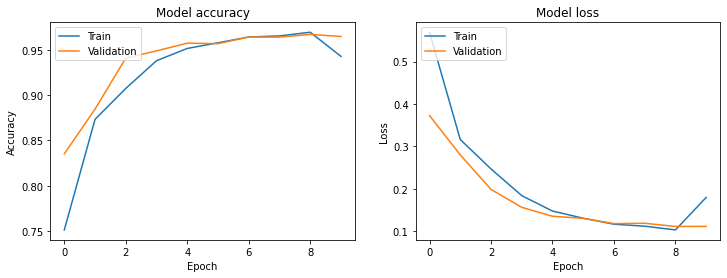

In [35]:
plot_metrics(crnn_history.history, validation=True)

In [36]:
crnn_model.save(f"{base_path}/models/2020_11_19_paper_sms_crnn")

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/2020_11_19_paper_sms_crnn/assets


In [37]:
crnn_y_train_predclass = crnn_model.predict(X_train)

sl_crnn_y_train_predclass = np.argmax(crnn_y_train_predclass, axis=1)
sl_y_train = np.argmax(y_train, axis=1)

crnn_train_accuracy = round(accuracy_score(sl_y_train, sl_crnn_y_train_predclass), 3)
print(f"Train accuracy: {crnn_train_accuracy}")

print("Train Classification Report")
print(classification_report(sl_y_train, sl_crnn_y_train_predclass))

Train accuracy: 0.97
Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23694
           1       0.99      0.95      0.97     23913

    accuracy                           0.97     47607
   macro avg       0.97      0.97      0.97     47607
weighted avg       0.97      0.97      0.97     47607



In [38]:
crnn_y_test_predclass = crnn_model.predict(X_test)

sl_crnn_y_test_predclass = np.argmax(crnn_y_test_predclass, axis=1)
sl_y_test = np.argmax(y_test, axis=1)

crnn_test_accuracy = round(accuracy_score(sl_y_test, sl_crnn_y_test_predclass), 3)
print(f"Test accuracy: {crnn_test_accuracy}")

print("Test Classification Report")
print (classification_report(sl_y_test, sl_crnn_y_test_predclass))

Test accuracy: 0.965
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11448
           1       0.99      0.94      0.96     11223

    accuracy                           0.96     22671
   macro avg       0.97      0.96      0.96     22671
weighted avg       0.97      0.96      0.96     22671



### Results

Configuration specific to this problem:
- Embedding dimension: 200
- Batch size: 32 (default)
- Vocabulary size: 150000
- Max vector length: 4539

**SMS configuration** (/models/2020_11_19_paper_sms_crnn)

- Time per epoch: ~250s
- 10th epoch accuracy: 0.9427
- 10th epoch validation accuracy: 0.9647
- Train set accuracy: 0.97
- Test set accuracy: 0.965

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.95|0.99|0.97|23694|
|1|0.99|0.95|0.97|23913|
||||||
|accuracy|||0.97|47607|
|macro avg|0.97|0.97|0.97|47607|
|weighted avg|0.97|0.97|0.97|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.95|0.99|0.97|11448|
|1|0.99|0.94|0.96|11223|
||||||
|accuracy|||0.96|22671|
|macro avg|0.97|0.96|0.96|22671|
|weighted avg|0.97|0.96|0.96|22671|


**Twitter configuration** (/models/2020_11_19_paper_crnn_twitter)

- Time per epoch: ~220s
- 10th epoch accuracy: 0.9629
- 10th epoch validation accuracy: 0.9612
- Train set accuracy: 0.964
- Test set accuracy: 0.96

Train set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.93|0.99|0.96|23694|
|1|0.99|0.93|0.96|23913|
||||||
|accuracy|||0.96|47607|
|macro avg|0.96|0.96|0.96|47607|
|weighted avg|0.96|0.96|0.96|47607|

Test set report:

|  |Precission|Recall|F1 Score|Support|
|:-|:-:|:-:|:-:|:-:|
|0|0.93|0.99|0.96|11448|
|1|0.99|0.93|0.96|11223|
||||||
|accuracy|||0.96|22671|
|macro avg|0.96|0.96|0.96|22671|
|weighted avg|0.96|0.96|0.96|22671|